<a href="https://colab.research.google.com/github/Kun-Thapar/Lunar_Crater_Detection/blob/main/YOLO_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

\

Using GPU to accelerate training

In [ ]:
!nvidia-smi

Mon Jul 29 07:41:12 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8



In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.0/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

Installing roboflow and importing the dataset

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets
!pip install roboflow --quiet

#!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="IDy72K9PGSBG5v5JA1EI")
project = rf.workspace("crater-detection-chkbo").project("crater_det_final")
version = project.version(2)
dataset = version.download("yolov8")

/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.1/74.1 kB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.8 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Crater_det_FINAL-2 in yolov8:: 100%|██████████| 1457/1457 [00:00<00:00, 3516.77it/s]


## Custom Training

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=30 imgsz=640 plots=True

/content
New https://pypi.org/project/ultralytics/8.2.2 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/Crater_det_FINAL-2/data.yaml, epochs=30, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visuali

In [ ]:
# model = YOLO('yolov8n.pt')
# print(model)

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

/content


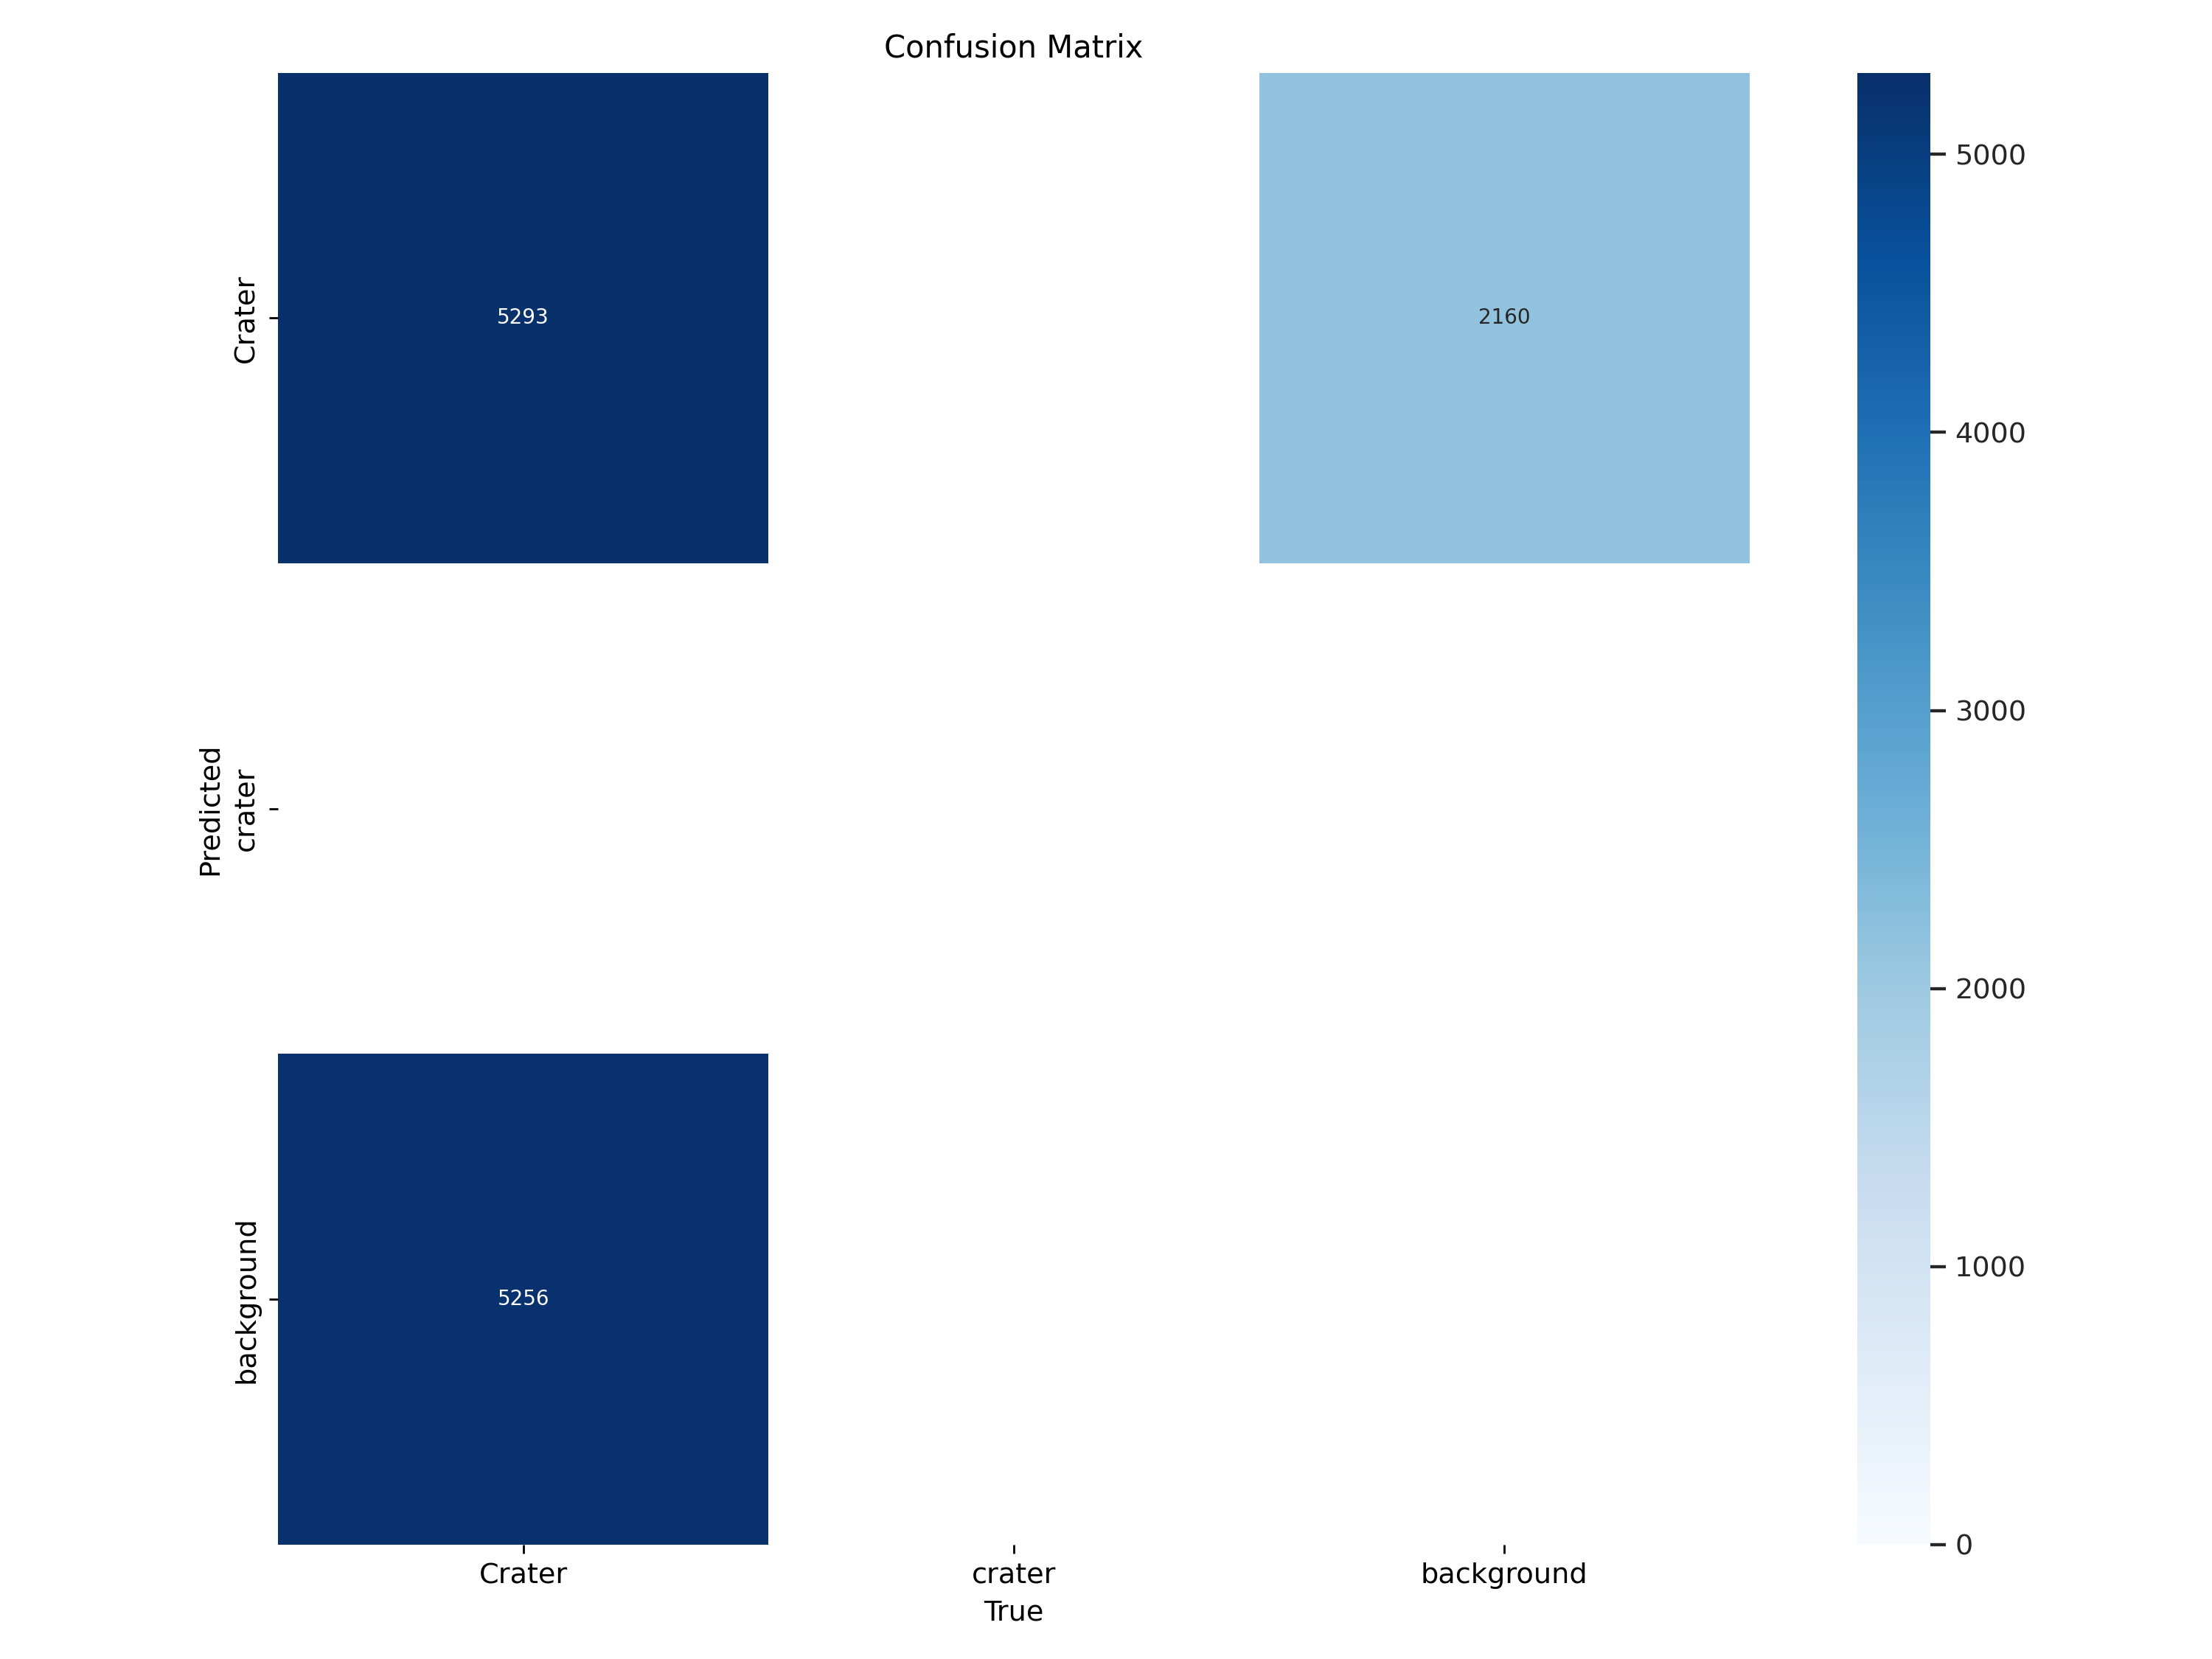

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


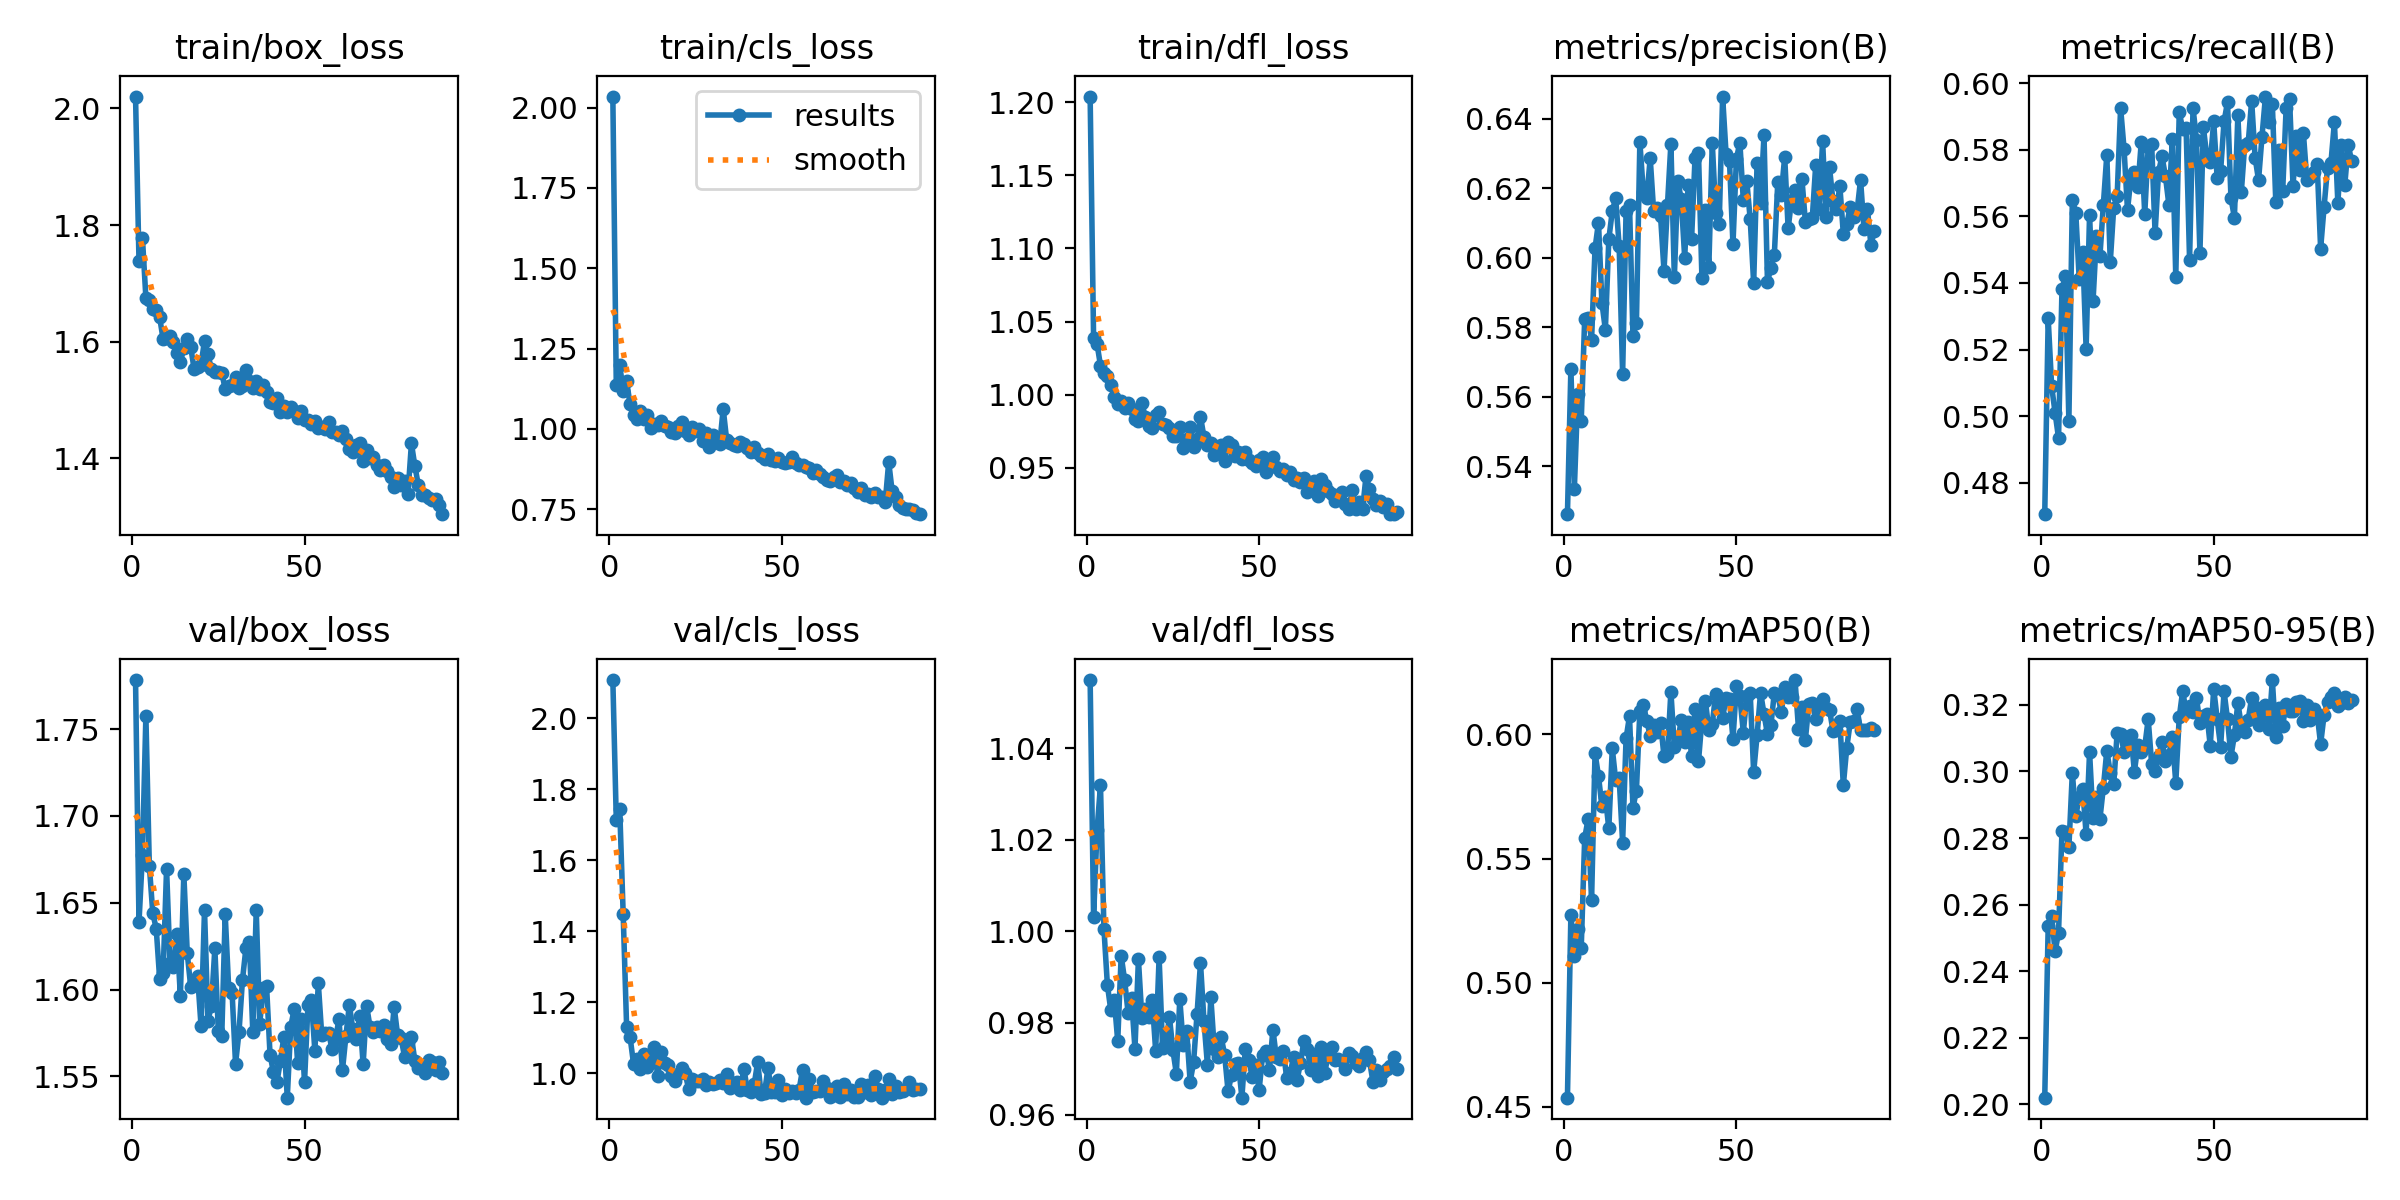

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/results.png', width=600)

In [ ]:
-# %cd {HOME}
# Image(filename=f'{HOME}/runs/detect/train2/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train4/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/Crater_det_FINAL-2/valid/labels.cache... 151 images, 0 backgrounds, 0 corrupt: 100% 151/151 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 10/10 [00:52<00:00,  5.23s/it]
                   all        151      10549      0.626      0.599      0.631      0.357
                Crater        151      10549      0.626      0.599      0.631      0.357
Speed: 4.0ms preprocess, 16.6ms inference, 0.1ms loss, 19.7ms postprocess per image
Results saved to runs/detect/val4
💡 Learn more at https://doc

## Inference with Custom Model

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train4/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/40 /content/datasets/Crater_det_FINAL-2/test/images/1010_png.rf.726cc4c54eaa83b9ee3674965c197bae.jpg: 640x640 96 Craters, 16.4ms
image 2/40 /content/datasets/Crater_det_FINAL-2/test/images/1032_png.rf.e8ac31d96109960e367e0a4d233129ab.jpg: 640x640 103 Craters, 16.4ms
image 3/40 /content/datasets/Crater_det_FINAL-2/test/images/1036_png.rf.d2dab965ed021269af61b2364212260a.jpg: 640x640 87 Craters, 16.4ms
image 4/40 /content/datasets/Crater_det_FINAL-2/test/images/1038_png.rf.240f2c434d556e1b361d6ea5e83ca5ae.jpg: 640x640 109 Craters, 16.4ms
image 5/40 /content/datasets/Crater_det_FINAL-2/test/images/114_png.rf.50692f51c5bcc531b100a90077c1eed9.jpg: 640x640 36 Craters, 16.4ms
image 6/40 /content/datasets/Crater_det_FINAL-2/test/images/11_png.rf.355c57d9cda1dad56b1ef5d

**NOTE:** Let's take a look at few results.

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/runs/detect/val3/val_batch2_labels.jpg')[:3]:
      display(Image(filename=image_path, width=900))
      print("\n")

We can now upload random images and check how good the model has performed:

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train4/weights/best.pt conf=0.25 source='/content/16.png' save=True

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/16.png: 320x640 32 Craters, 87.2ms
Speed: 4.5ms preprocess, 87.2ms inference, 569.7ms postprocess per image at shape (1, 3, 320, 640)
Results saved to runs/detect/predict8
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [ ]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train/")

Dependency ultralytics==8.0.196 is required but found version=8.0.20, to fix: `pip install ultralytics==8.0.196`
Would you like to continue with the wrong version of ultralytics? y/n: y
An error occured when getting the model upload URL: This version already has a trained model. Please generate and train a new version in order to upload model to Roboflow.
